In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ML/Ml data/XPEV.csv')
print(df.head())

         Date       Open       High        Low      Close  Adj Close    Volume
0  2021-10-01  36.750000  36.759998  35.080002  35.459999  35.459999   7770600
1  2021-10-04  35.180000  35.200001  33.520000  34.110001  34.110001   6557200
2  2021-10-05  34.259998  35.740002  34.255001  35.520000  35.520000   5425300
3  2021-10-06  34.849998  36.118000  34.720001  35.750000  35.750000   5469600
4  2021-10-07  36.900002  38.880001  36.840000  38.259998  38.259998  12748700


In [3]:
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15))

257   2022-10-10
258   2022-10-11
259   2022-10-12
260   2022-10-13
261   2022-10-14
262   2022-10-17
263   2022-10-18
264   2022-10-19
265   2022-10-20
266   2022-10-21
267   2022-10-24
268   2022-10-25
269   2022-10-26
270   2022-10-27
271   2022-10-28
Name: Date, dtype: datetime64[ns]


In [4]:
cols = list(df)[1:6]
#Date and volume columns are not used in training. 
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']


['Open', 'High', 'Low', 'Close', 'Adj Close']


In [5]:
df_for_training = df[cols].astype(float)

In [6]:

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [7]:
trainX = []
trainY = []


In [8]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.


In [9]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (258, 14, 5).
trainY shape == (258, 1).


In [10]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            17920     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
15/15 [==============================] - 12s 83ms/step - loss: 0.7087 - val_loss: 0.4658
Epoch 2/5
15/15 [==============================] - 1s 53ms/step - loss: 0.2380 - val_loss: 0.0788
Epoch 3/5
15/15 [==============================] - 1s 55ms/step - loss: 0.1372 - val_loss: 0.3730
Epoch 4/5
15/15 [==============================] - 1s 54ms/step - loss: 0.1088 - val_loss: 0.0649
Epoch 5/5
15/15 [==============================] - 1s 54ms/step - loss: 0.1025 - val_loss: 0.0944


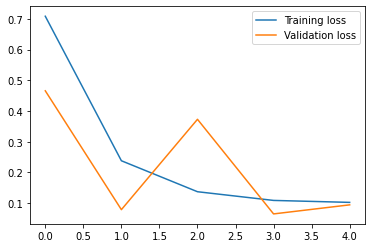

In [11]:
# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


[Timestamp('2022-10-07 00:00:00', freq='C'), Timestamp('2022-10-11 00:00:00', freq='C'), Timestamp('2022-10-12 00:00:00', freq='C'), Timestamp('2022-10-13 00:00:00', freq='C'), Timestamp('2022-10-14 00:00:00', freq='C'), Timestamp('2022-10-17 00:00:00', freq='C'), Timestamp('2022-10-18 00:00:00', freq='C'), Timestamp('2022-10-19 00:00:00', freq='C'), Timestamp('2022-10-20 00:00:00', freq='C'), Timestamp('2022-10-21 00:00:00', freq='C'), Timestamp('2022-10-24 00:00:00', freq='C'), Timestamp('2022-10-25 00:00:00', freq='C'), Timestamp('2022-10-26 00:00:00', freq='C'), Timestamp('2022-10-27 00:00:00', freq='C'), Timestamp('2022-10-28 00:00:00', freq='C')]
1/1 [==============================] - 1s 653ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


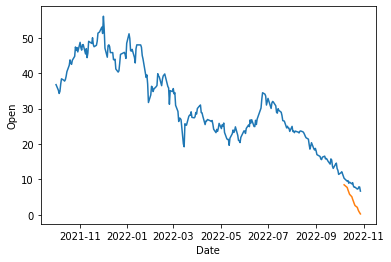

In [12]:
#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])